In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rnd = np.random
rnd.seed(26)

In [3]:
n = 10  # number of clients
f = 3  # number of charging stations
b = 3 #number of battery swapping stations
num_points = n + f + b
num_of_copies = 2
num_of_vehicles = 4

# Generate random coordinates for xc and yc
xc = np.random.rand(num_points) * 200
yc = np.random.rand(num_points) * 100

In [4]:
sum_xc=0
sum_yc=0
for i in xc:
    sum_xc+=i
for i in yc:
    sum_yc+=i
sum_xc/=num_points
sum_yc/=num_points

xc = np.insert(xc, 0, sum_xc)
yc = np.insert(yc, 0, sum_yc)

# Randomly select f points from the generated points
selected_indices = np.random.choice(np.setdiff1d(np.arange(1, num_points), 0), f+b, replace=False)
selected_xc = xc[selected_indices]
selected_yc = yc[selected_indices]

# Remove the selected points from xc and yc
xc = np.delete(xc, selected_indices)
yc = np.delete(yc, selected_indices)
xc=np.append(xc,xc[0])
yc=np.append(yc,yc[0])

selected_indices_f = np.random.choice(f+b, f, replace=False)
selected_xc_f = selected_xc[selected_indices_f]
selected_yc_f = selected_yc[selected_indices_f]

selected_xc = np.delete(selected_xc, selected_indices_f)
selected_yc = np.delete(selected_yc, selected_indices_f)
# print(xc)
# print(selected_xc_f)
# print(selected_xc)
b_x_coordinates=selected_xc;
b_y_coordinates=selected_yc;

num_of_copies = 2
# Append copies of each selected point after the first n points

for i in range(f):
    for _ in range(num_of_copies):
        xc = np.append(xc, selected_xc_f[i])
        yc = np.append(yc, selected_yc_f[i])

for i in range(b):
    for _ in range(num_of_copies):
        xc = np.append(xc, b_x_coordinates[i])
        yc = np.append(yc, b_y_coordinates[i])

print(xc)
print(yc)

[ 93.35736049  61.58699052 153.65953231 157.84414723 174.1124125
  53.90104912  99.2384282  147.82434942  56.55312092 152.18797389
  58.70390186  93.35736049 103.87829586 103.87829586  37.58427832
  37.58427832 107.76525172 107.76525172  35.94904935  35.94904935
  38.99039833  38.99039833  53.93858833  53.93858833]
[67.39515081 96.24055116 56.81748454 48.5492354  65.37043706 99.57388974
 14.19824639 97.53416366 60.01319656 75.06354721 92.32994595 67.39515081
 91.32143262 91.32143262 53.66293985 53.66293985 29.50635714 29.50635714
 72.04862077 72.04862077 61.9557474  61.9557474  64.13661746 64.13661746]


In [5]:
# xc = [65.53728031, 54.44603955, 88.12234968, 102.51692288, 31.34438071, 105.3051593, 65.53728031, 124.89947439, 124.89947439, 13.08142115, 13.08142115, 64.58673463, 64.58673463, 5.53304047, 5.53304047]
# yc = [49.32313992, 97.1122129, 54.21251519, 77.75853955, 6.09951352, 26.31270804, 49.32313992, 43.02173031, 43.02173031, 54.31221068, 54.31221068, 83.76162527, 83.76162527, 1.3172038, 1.3172038]

Text(91.35736049289028, 65.39515080685248, 'Depo')

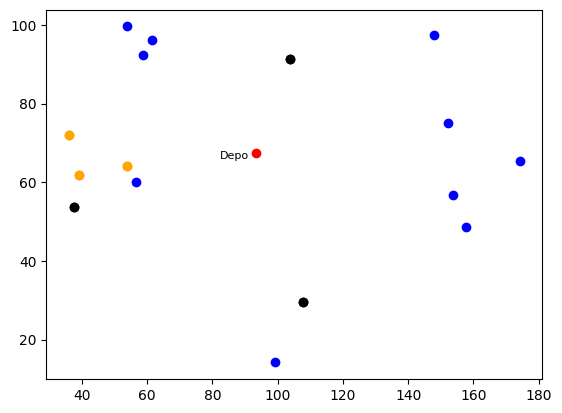

In [6]:
plt.scatter(xc[1:n+1], yc[1:n+1], c = 'blue')
plt.scatter(xc[n+2:n+2+f*num_of_copies],yc[n+2:n+2+f*num_of_copies], c= 'black')
plt.scatter(xc[n+2+f*num_of_copies:n+2+f*num_of_copies+b*num_of_copies],yc[n+2+f*num_of_copies:n+2+f*num_of_copies+b*num_of_copies], c= 'orange')
plt.scatter(xc[0], yc[0], c='r')
plt.text(xc[0]-2, yc[0]-2, 'Depo', fontsize=8, color='black', ha='right', va='bottom')

In [7]:
I = [i for i in range(1, n+1)] #Number of nodes/locations
F = [i for i in range(n+2,n+1+num_of_copies*f+1)]
B = [i for i in range(n+1+num_of_copies*f+1,n+1+num_of_copies*f+num_of_copies*b+1)]
F_comb = F + B
All = I + F + B
F_depo = [0] + F + B
I_depo = [0] + All
I_dest = All + [n+1]
I_depo_dest = All + [0] + [n+1]
K = [i for i in range(1,num_of_vehicles+1)]
A = [(i, j, k) for i in I_depo for j in I_dest for k in K if i != j] 
dist = [(i, j) for i in I_depo for j in I_dest if i != j] 
total_with_vehicles = [(i,k) for i in I_depo_dest for k in K]
kthVehicleChargingAndSwapping = [(i,k) for i in F_comb for k in K]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in dist} 
lb = 14
ub = 20
C = {k: rnd.uniform(lb, ub) for k in K}

S = 0.002  
thresholds = [50, 100, 150, 200]
multipliers = [1.0, 1.19, 1.29, 1.39, 1.49]
ranges=4
t_base = {}

for i, j, k in A:
    avg_value = c[i,j]
    if(c[i,j]<thresholds[0]):
        for k in K:
                t_base[i, j, k] = C[k] *S* multipliers[0]*c[i,j]
    elif(c[i,j]<=200):
         for x in range(0,ranges-1):
              if(c[i,j]>=thresholds[x] and c[i,j]<=thresholds[x+1]):
                           for k in K:
                               t_base[i, j, k] = C[k] *S* multipliers[x+1]*c[i,j]
    else:
         for k in K:
                t_base[i, j, k] = C[k] *S* multipliers[ranges-1]*c[i,j]

q = {i: rnd.uniform(1, 10) for i in All}
Q = [0]*(k+1)
fastTime = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
slowTime = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
mediumTime = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
batterySwapTime = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
fastChargerCost = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
mediumChargerCost = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
slowChargerCost = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
batterySwapCost = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
fastStatNum = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
mediumStatNum = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
slowStatNum = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
batteryStatNum = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
maxVehicleCost = [0]*(num_of_vehicles+1)

# Vehicle charging min and max constraints
minChargeValue = 30000
maxChargeValue = 50000

# Time constraints for fast 
minFastTimeValue = 2.0
maxFastTimeValue = 3.0

#Time constraint for medium
minMediumTimeValue = 4.0
maxMediumTimeValue = 5.0

#TIme constraint for slow
minSlowTimeValue = 7.0
maxSlowTImeValue = 8.0

#Time constraint for swapping battery
minBatSwapTime = 0.5
maxBatSwapTIme = 0.8

#Cost constraint for fast charging
minFastChargerCost = 300.0
maxFastChargerCost = 400.0

#Cost constraint for medium charging
minMediumChargerCost = 200.0
maxMediumChargerCost = 300.0

#Cost constraint for slow charging
minSlowChargerCost = 100.0
maxSlowChargerCost = 200.0

#Battery swap cost 
minBatterySwapCost = 550.0
maxBatterySwapCost = 650.0

#Max allowed vehicle cost
minVehicleCostLimit = 30000
maxVehicleCostLimit = 50000

for i in range(1,k+1):
      Q[i] = rnd.uniform(minChargeValue, maxChargeValue)

for i in range(n+2, n+1+num_of_copies*f+1):
      fastTime[i] = rnd.uniform(minFastTimeValue,maxFastTimeValue)
      mediumTime[i] = rnd.uniform(minMediumTimeValue, maxMediumTimeValue)
      slowTime[i] = rnd.uniform(minSlowTimeValue, maxSlowTImeValue)
      fastChargerCost[i] = rnd.uniform(minFastChargerCost, maxFastChargerCost)
      mediumChargerCost[i] = rnd.uniform(minMediumChargerCost, maxMediumChargerCost)
      slowChargerCost[i] = rnd.uniform(minSlowChargerCost, maxSlowChargerCost)
      fastStatNum[i] = 1
      slowStatNum[i] = 1
      mediumStatNum[i] = 1

for i in range(n+1+num_of_copies*f+1,n+1+num_of_copies*f+num_of_copies*b+1):
      batterySwapTime[i] = rnd.uniform(minBatSwapTime, maxBatSwapTIme)
      batterySwapCost[i] = rnd.uniform(minBatterySwapCost,maxBatterySwapCost)
      batteryStatNum[i] = 1

q[0]=0
for i in range(n+1,n+2+num_of_copies*(f+b)):
    q[i] = 0

for i in range(1,num_of_vehicles+1):
      maxVehicleCost[i] = rnd.randint(minVehicleCostLimit,maxVehicleCostLimit)

#For auxTime
auxVariable = [(i,j,k) for i in I_depo for j in F if i!=j for k in K]

# print(I)
# print(F)
# print(B)
# print(I_dest)
# print(I_depo)
# print(I)
# print(F)
# print(F_comb)
# print(B)
# print(auxVariable)
# print(t_base)

In [8]:
print(q)
print(Q)
print(C)
print(batterySwapTime)
print(batterySwapCost)
print(batteryStatNum)
print(fastTime)
print(slowTime)
print(mediumTime)
# print(fastCCost)
print(mediumChargerCost)
print(slowChargerCost)
print(fastChargerCost)
print(I_depo)
print(B)

{1: 3.1565388672202683, 2: 1.9343327526400746, 3: 2.6766758918166316, 4: 7.77448239003021, 5: 9.57607503321366, 6: 8.115238216212724, 7: 2.67948322932213, 8: 5.608422444314372, 9: 1.7330417909532498, 10: 5.709157968583231, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 0: 0, 11: 0}
[0, 45649.02345326221, 30775.895353546657, 49708.1156514422, 37041.44615298714]
{1: 19.811998930493587, 2: 14.30573830958393, 3: 19.30133528085612, 4: 18.61984812025195}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.7085308373955252, 0.7421057442663906, 0.7572024815693112, 0.6767562892766769, 0.6661748329055628, 0.6720704739332518]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 637.7682756377917, 640.0551550009333, 593.7775288181911, 628.5250683676974, 612.0903177521269, 623.6259592613818]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.2778522728620363, 2.4097813642084165, 2.74529779638101

In [9]:
from gurobipy import Model, GRB, quicksum

H = 50 
Temp = 323
theta = 0.1
H = H*0.8 + Temp*(theta)

model = Model('ECVRP')
x = model.addVars(A, vtype=GRB.BINARY, name='x')
u = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS,lb=0.0, name='u')
y = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS,lb=0.0, name='y')
h = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS, name='h')
fastCh = model.addVars(kthVehicleChargingAndSwapping, vtype = GRB.BINARY, name = "fast charging")
mediumCh = model.addVars(kthVehicleChargingAndSwapping, vtype = GRB.BINARY, name = "meidum charging")
slowCh = model.addVars(kthVehicleChargingAndSwapping, vtype = GRB.BINARY, name = "slow charging")
batterySwap = model.addVars(kthVehicleChargingAndSwapping, vtype = GRB.BINARY, name = "battery swapping")
auxTime = model.addVars(auxVariable, vtype = GRB.CONTINUOUS, name = "Auxillary variable for time")
auxCost = model.addVars(auxVariable, vtype = GRB.CONTINUOUS, name = "Auxillary variable for cost")

model.modelSense = GRB.MINIMIZE
model.setObjective(quicksum(x[i, j, k]*t_base[i,j,k]*u[j,k] for i in I_depo for j in I_dest if i!=j for k in K) +  quicksum(auxTime[i,j,k]*(Q[k] - y[j,k]) for i in I_depo for j in F if i!=j for k in K) + quicksum(x[i,j,k]*batterySwapTime[j]*batterySwap[j,k] for i in I_depo for j in B if i!=j for k in K))
model.addConstrs((quicksum(x[i, j, k] for k in K for j in I_dest if i!=j) == 1 for i in I), name='outgoing')
model.addConstrs((quicksum(x[i, j, k] for k in K for j in I_dest if i!=j) <= 1 for i in F_comb), name='charging_outgoing')
model.addConstrs((quicksum(x[0, j, k] for j in All) <= 1 for k in K), name='charging_outgoing')
model.addConstrs((quicksum(x[i, j, k] for i in I_depo if i!=j)-quicksum(x[j,i,k] for i in I_dest if i!=j) == 0 for j in All for k in K), name='blockage')
model.addConstrs((u[j,k]<=u[i,k]-q[i]*x[i,j,k]+ C[k]*(1-x[i,j,k]) for i in I_depo for j in I_dest if i!=j for k in K), name='weight_transfer')
model.addConstrs(y[j,k]<=Q[k] - h[i,k]*c[i,j]*x[i,j,k] for i in F for j in I_dest if i!=j for k in K)
model.addConstrs((u[0,k]<=C[k] for k in K), name='Specifying_constant_weight')
model.addConstrs((y[0,k]==Q[k] for k in K), name='Specifying_constant_charge')
model.addConstrs(u[0,k]==quicksum(x[i,j,k]*q[j] for i in I_depo for j in I if i!=j) for k in K)
model.addConstrs(quicksum(auxCost[i, j, k] * (Q[k] - y[j, k]) for j in F for i in I_depo if i != j) +quicksum(batterySwap[p, k] * batterySwapCost[p] for p in B for i in I_depo if i != p) <= maxVehicleCost[k] for k in K)
model.addConstrs((y[j,k]<=y[i,k]-h[i,k]*c[i,j]*x[i,j,k]+Q[k]*(1-x[i,j,k]) for i in I for j in I_dest  if i!=j for k in K), name = 'charge_left')
model.addConstrs(h[i,k] == H + u[i,k] / C[k] for i in I_depo_dest for k in K)
model.addConstrs(quicksum(fastCh[i,k] for k in K)<=fastStatNum[i] for i in F)
model.addConstrs(quicksum(mediumCh[i,k] for k in K)<=mediumStatNum[i] for i in F)
model.addConstrs(quicksum(slowCh[i,k] for k in K)<=slowStatNum[i] for i in F)
model.addConstrs(quicksum(batterySwap[i,k] for k in K)<=batteryStatNum[i] for i in B)
model.addConstrs(auxTime[i,j,k]==x[i,j,k]*(fastCh[j,k]*fastTime[j] + slowCh[j,k]*slowTime[j] + mediumCh[j,k]*mediumTime[j]) for i in I_depo for j in F if i!=j for k in K)
model.addConstrs(auxCost[i,j,k]==x[i,j,k]*(fastCh[j,k]*fastChargerCost[j] + slowCh[j,k]*slowChargerCost[j] + mediumCh[j,k]*mediumChargerCost[j]) for i in I_depo for j in F if i!=j for k in K)
model.addConstrs((fastCh[i,k] + mediumCh[i,k] + slowCh[i,k])<=1 for i in F for k in K)
model.Params.MIPGap = 0.1
# model.Params.TimeLimit = 200 # seconds
model.params.NonConvex = 2

model.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-07


Set parameter MIPGap to value 0.1
Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 2298 rows, 3564 columns and 13232 nonzeros
Model fingerprint: 0xbf9cfa4c
Model has 3032 quadratic objective terms
Model has 2468 quadratic constraints
Variable types: 1344 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [5e-02, 3e+01]
  QMatrix range    [1e+00, 4e+02]
  QLMatrix range   [1e+00, 5e+04]
  Objective range  [3e+04, 5e+04]
  QObjective range [3e-01, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+04]
  QRHS range       [3e+04, 5e+04]
Presolve added 3076 rows and 0 columns
Presolve removed 0 rows and 150 columns
Presolve time: 0.19s
Presolved: 12645 rows, 8251 columns, 49931 nonzeros
Presolved model has 1056 bilin

In [ ]:
print(t_base)

{(0, 1, 1): 2.334046689654413, (0, 1, 2): 2.2101337744422493, (0, 1, 3): 2.388359367334795, (0, 1, 4): 2.2057644898585766, (0, 2, 1): 2.981014543677777, (0, 2, 2): 2.8227545551204516, (0, 2, 3): 3.0503820001168234, (0, 2, 4): 2.8171741608005227, (0, 3, 1): 3.2499342086539507, (0, 3, 2): 3.077397462141106, (0, 3, 3): 3.325559357859173, (0, 3, 4): 3.071313656063549, (0, 4, 1): 0.46053400661517235, (0, 4, 2): 0.43608457654722743, (0, 4, 3): 0.47125051677455065, (0, 4, 4): 0.4352224669140827, (0, 6, 1): 2.278973888727596, (0, 6, 2): 2.1579847502084992, (0, 6, 3): 2.3320050362231055, (0, 6, 4): 2.1537185607090574, (0, 7, 1): 2.278973888727596, (0, 7, 2): 2.1579847502084992, (0, 7, 3): 2.3320050362231055, (0, 7, 4): 2.1537185607090574, (0, 8, 1): 2.3094034466547493, (0, 8, 2): 2.186798824071823, (0, 8, 3): 2.363142682287047, (0, 8, 4): 2.1824756711024866, (0, 9, 1): 2.3094034466547493, (0, 9, 2): 2.186798824071823, (0, 9, 3): 2.363142682287047, (0, 9, 4): 2.1824756711024866, (0, 10, 1): 0.76

In [ ]:
# for var_name in u:
#     u_var = u[var_name]
#     print(f"{var_name} = {u_var.X}")

In [ ]:
active_arcs = [a for a in A if x[a].x > 0.99]

values = {}
vehicle_dist={}
vehicle_time={}
for i,j,k in active_arcs:
    if(k not in vehicle_dist):
      vehicle_dist[k] = c[i,j]     
      vehicle_time[k] = (t_base[i,j,k])*(u[j,k].x)
    else:
         vehicle_dist[k]+=c[i,j]
         vehicle_time[k]+=(t_base[i,j,k])*(u[j,k].x)

    if i!=0:
        values[i]=(j,k)
        
colors = ['magenta', 'green', 'red', 'yellow', 'cyan']
def rec(i, j,k,col):
        print(i,j,k)
        mid_x = (xc[i] + xc[j]) / 2
        mid_y = (yc[i] + yc[j]) / 2
        plt.arrow(xc[i], yc[i], mid_x - xc[i], mid_y - yc[i],
                  head_width=2, head_length=2, fc='red', ec='red')   
        plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = colors[col])
        if(j==n+1):
             return
        rec(j,values[j][0],values[j][1],col)


61.586990524994164


174.1124124951647
37.58427832441378
99.23842819757225
0 1 4
1 3 4
3 5 4
0 2 2
2 9 2
9 5 2
0 4 1
4 5 1


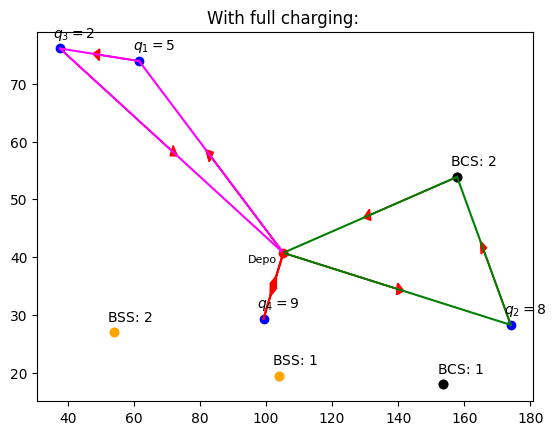

In [ ]:
plt.scatter(xc[1:n+1], yc[1:n+1], c = 'blue')
plt.scatter(xc[n+2:n+2+f*num_of_copies],yc[n+2:n+2+f*num_of_copies], c= 'black')
plt.scatter(xc[n+2+f*num_of_copies:n+2+f*num_of_copies+b*num_of_copies],yc[n+2+f*num_of_copies:n+2+f*num_of_copies+b*num_of_copies], c= 'orange')
plt.scatter(xc[0], yc[0], c='r')
plt.text(xc[0]-2, yc[0]-2, 'Depo', fontsize=8, color='black', ha='right', va='bottom')

visited = []
for i in I:
    print(xc[i])
    if(xc[i] not in visited):
      plt.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-2, yc[i]+2))
      visited.append(xc[i])

count=1
for i in F:
    if(xc[i] not in visited):
      plt.annotate('BCS: $%d$' % count, (xc[i]-2, yc[i]+2))
      count+=1
      visited.append(xc[i])

count=1
for i in B:
    if(xc[i] not in visited):
      plt.annotate('BSS: $%d$' % count, (xc[i]-2, yc[i]+2))
      count+=1
      visited.append(xc[i])

col=0
for i,j,k in active_arcs:
    if(i==0):
        mid_x = (xc[i] + xc[j]) / 2
        mid_y = (yc[i] + yc[j]) / 2
        plt.arrow(xc[i], yc[i], mid_x - xc[i], mid_y - yc[i],
                  head_width=2, head_length=2, fc='red', ec='red')        
        rec(i,j,k,col)
        col+=1

total_charging_time=0
for i,j,k in active_arcs:
   if(j in F):
      total_charging_time+=(auxTime[i,j,k].x)*(Q[k]-y[j,k].x)

plt.title('With full charging: ')
plt.show()
